# **AI4ALL 2020 Final Project**

By: Abigail Batinga

>**Motivation:** By predicting happiness scores based on country factors, we can help policy makers be better informed to improve the well being of people globally.

>**Dataset:** World Happiness Report 2019

>**Description:** The World Happiness Report ranks 155 countries by their happiness levels based on the country's happiness score. The country's happiness score is collected by surveying a random sample population based on the Cantril ladder which asks respondents to think of a ladder with the best possible life being a 10 and the worst being a 0.

>**Objectives:**
*   Find features that contribute most strongly to explaining happiness score for a country. This will be done by taking subsets of the columns in iterations.
*   Find the best regression model to increase R2 score and decrease MSE.
*   Extend work by using other methods to assess feature importance. ie. principal component analysis.


In [ ]:
# Connecting your google drive with colab so you can access data from spreadsheets
# You will need to run this code and enter a key to authenticate every day/session
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# Import the python packages we want to use
# Pandas helps us explore and manipulate the data
# Matplotlib helps us to graph and plot the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestRegressor
import numpy as np
%matplotlib inline

In [ ]:
# Loading and storing world happiness dataset
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1bwIXIzmE77O1Gsmp3_H3vveAExYyZ17mkGagq-4PNtY/edit#gid=906238556')

In [ ]:
# Load happiness data into Pandas dataframe
sheet = wb.worksheet('data')
data = sheet.get_all_values()

# Pandas stores data in a 'data frame'
df = pd.DataFrame(data)

# Set the headings
df.columns = df.iloc[0]
df = df.iloc[1:]

# Print the first few lines of the data frame to check that everything looks good
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.6,1.383,1.573,0.996,0.592,0.252,0.41
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# Check data types in dataframe
# Pandas imports all data as objects
df.dtypes

0
Overall rank                    object
Country or region               object
Score                           object
GDP per capita                  object
Social support                  object
Healthy life expectancy         object
Freedom to make life choices    object
Generosity                      object
Perceptions of corruption       object
dtype: object

In [ ]:
# Cast data as proper types
new_df = {
    'Rank': df['Overall rank'].astype(int),
    'Country': df['Country or region'].astype(str),
    'Score': df['Score'].astype(float),
    'GDP': df['GDP per capita'].astype(float),
    'SocialSupport': df['Social support'].astype(float),
    'Health': df['Healthy life expectancy'].astype(float),
    'Freedom': df['Freedom to make life choices'].astype(float),
    'Generosity': df['Generosity'].astype(float),
    'Corruption': df['Perceptions of corruption'].astype(float)
}

In [ ]:
# Reassign dataframe with proper types
df = pd.DataFrame(new_df)
df.head()

,Rank,Country,Score,GDP,SocialSupport,Health,Freedom,Generosity,Corruption
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# Check types
df.dtypes

Rank               int64
Country           object
Score            float64
GDP              float64
SocialSupport    float64
Health           float64
Freedom          float64
Generosity       float64
Corruption       float64
dtype: object

# **Data Exploration**

> Ideally, I am searching for the best features to use in my regression model. To do so, I want to explore the data and search for features that best explain my target variable (country happiness score).



In [ ]:
# Describe happiness data with various statistical metrics
df.describe()

,Rank,Score,GDP,SocialSupport,Health,Freedom,Generosity,Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


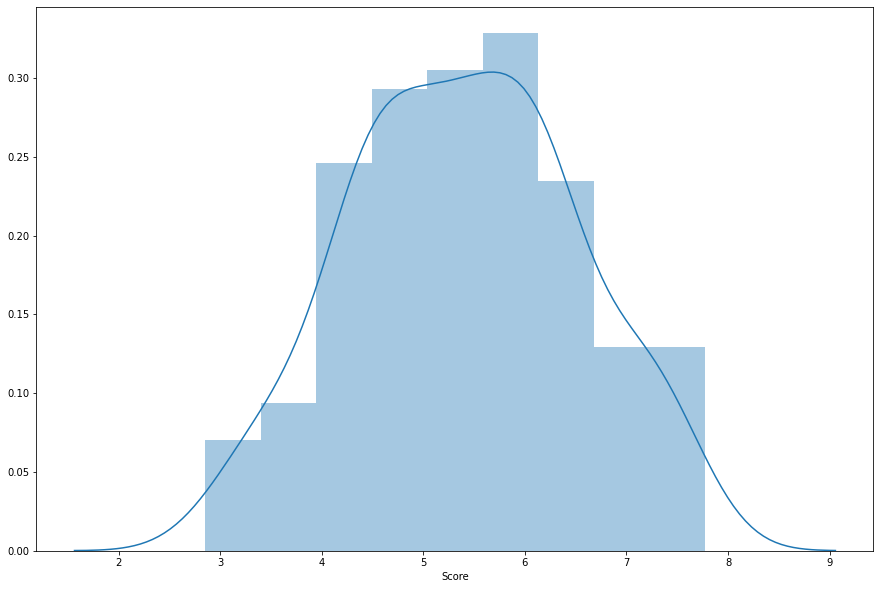

In [ ]:
# Check average value of score column
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Score'])

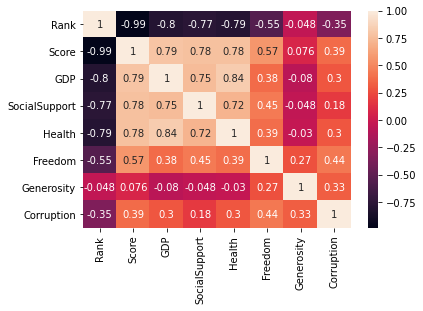

In [ ]:
# Create correlation plot
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

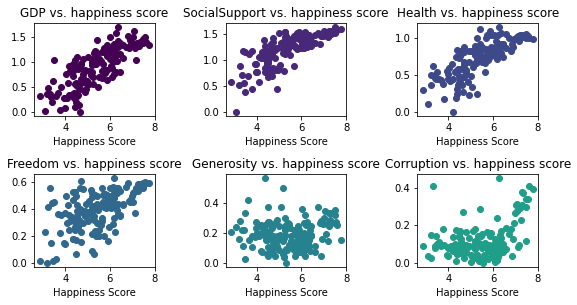

In [ ]:
jet= plt.get_cmap('viridis')
colors = iter(jet(np.linspace(0,1,10)))


# Visualize correlation between features and target variable
def plot_correlation(df, vars, no_rows, no_cols):
  fig = plt.figure(figsize = (8, 6))

  for graph, var in enumerate(vars):
    ax = fig.add_subplot(no_rows, no_cols, graph+1)
    factor = df.loc[:,var]
    ax.scatter(df['Score'], factor, c = next(colors))
    ax.set_xlabel("Happiness Score")
    #ax.set_ylabel("{}".format(factor))
    ax.set_title(var + " vs. happiness score")
  fig.tight_layout()
  plt.show()

# vars = df[['GDP', 'SocialSupport', 'Health', 'Freedom', 'Generosity', 'Corruption']]
vars = df.columns[3:]
plot_correlation(df, vars, 3, 3)

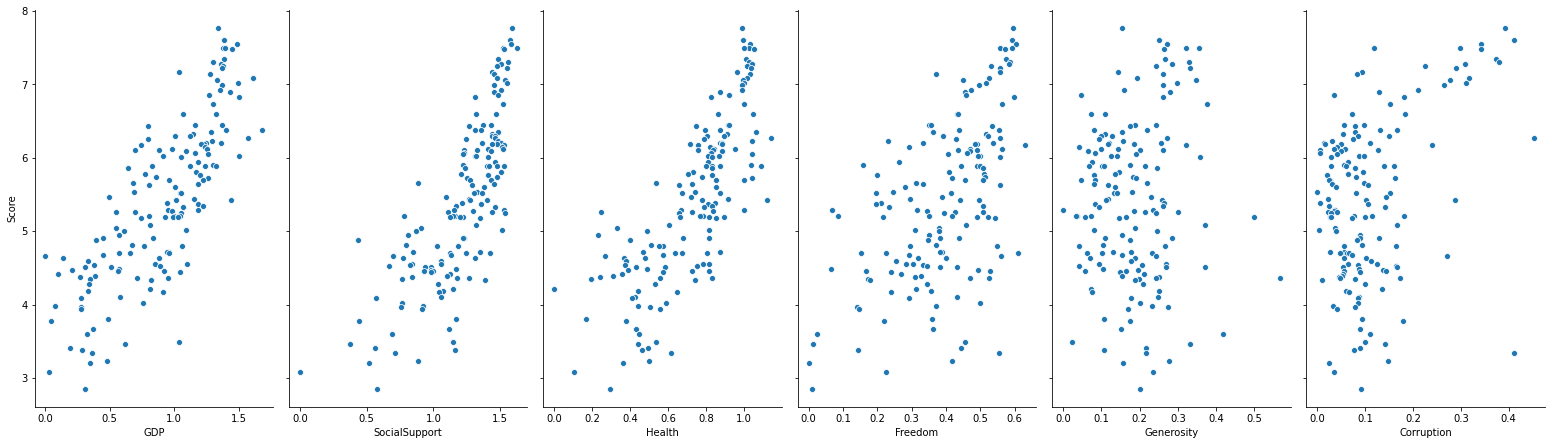

In [ ]:
sns.pairplot(df, x_vars=['GDP', 'SocialSupport', 'Health', 'Freedom', 'Generosity', 'Corruption'], y_vars='Score', height=6, aspect=.6)

In [ ]:
# X = df[['Health']]
# y = df[['Score']]

# lm2 = LinearRegression()
# lm2.fit(X, y)

# # print the coefficients
# print(lm2.intercept_)
# print(lm2.coef_)

# A unit increase in health score is associated with a unit increase in happiness score of 3.58

[2.80683162]
[[3.58536714]]


# **Feature Selection**

> I will assess various features using linear regression

> Features(3-8) 

3. GDP
4. Social Support
5. Health
6. Freedom
7. Generosity
8. Corruption


In [ ]:
def testFeatures(feature1, feature2):

  X = df[[feature1, feature2]].values
  y = df['Score'].values

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


  # Define linear regression model
  regressor = LinearRegression()
  regressor.fit(X, y)


  # Predict on test data
  y_pred = regressor.predict(X_test)

  return y_test, y_pred

In [ ]:
# Testing features 3 and 4 -> GDP, Social Support
y_test, y_pred = testFeatures('GDP', 'SocialSupport')

# Check difference between actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = results_df.head(15)
df1

,Actual,Predicted
0,6.436,5.358054
1,5.893,6.344680
2,6.198,6.319898
3,4.639,5.532076
4,6.446,6.370393
5,7.307,6.478135
6,6.100,5.411577
7,4.707,5.816417
8,4.107,4.734721
9,6.174,5.683750


In [ ]:
# Assess model with metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5579833281564716
Mean Squared Error: 0.49984410299626036
Root Mean Squared Error: 0.706996536763979
R squared score:  0.5778932713174805


In [ ]:
# Testing features 3 and 5 -> GDP, Health
y_test, y_pred = testFeatures('GDP', 'Health')

# Check difference between actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = results_df.head(15)
df1

,Actual,Predicted
0,6.436,5.305498
1,5.893,6.108141
2,6.198,6.132419
3,4.639,4.931951
4,6.446,6.351643
5,7.307,6.464895
6,6.100,5.434771
7,4.707,5.620915
8,4.107,4.445081
9,6.174,5.250832


In [ ]:
# Assess model with metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 0.580118673242908
Mean Squared Error: 0.5058361481522542
Root Mean Squared Error: 0.7112215886432682
R squared score:  0.5728331284374244


In [ ]:
# Testing features 3 and 6 -> GDP, Freedom
y_test, y_pred = testFeatures('GDP', 'Freedom')

# Check difference between actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = results_df.head(15)
df1

,Actual,Predicted
0,6.436,5.551874
1,5.893,6.281081
2,6.198,5.909865
3,4.639,5.378020
4,6.446,6.181361
5,7.307,6.622798
6,6.100,5.595883
7,4.707,4.935466
8,4.107,4.881656
9,6.174,5.679444


In [ ]:
# Assess model with metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5704148657679611
Mean Squared Error: 0.536137964100549
Root Mean Squared Error: 0.7322144249470568
R squared score: 0.5472439490784949


In [ ]:
# Testing features 3 and 7 -> GDP, Generosity
y_test, y_pred = testFeatures('GDP', 'Generosity')

# Check difference between actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = results_df.head(15)
df1

,Actual,Predicted
0,6.436,5.154485
1,5.893,6.019675
2,6.198,6.069357
3,4.639,5.160455
4,6.446,6.541664
5,7.307,6.539381
6,6.100,5.481214
7,4.707,5.332835
8,4.107,4.772895
9,6.174,5.271188


In [ ]:
# Assess model with metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5980176723629705
Mean Squared Error: 0.5561657194130263
Root Mean Squared Error: 0.745765190534545
R squared score: 0.5303309751589707


In [ ]:
# Testing features 3 and 8 -> GDP, Corruption
y_test, y_pred = testFeatures('GDP', 'Corruption')

# Check difference between actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = results_df.head(15)
df1

,Actual,Predicted
0,6.436,5.125649
1,5.893,6.194695
2,6.198,5.931556
3,4.639,5.247951
4,6.446,6.344732
5,7.307,6.752057
6,6.100,5.158321
7,4.707,5.399346
8,4.107,4.680674
9,6.174,5.321773


In [ ]:
# Assess model with metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.6384692027532056
Mean Squared Error: 0.6166756982067279
Root Mean Squared Error: 0.7852870164511367
R squared score: 0.4792317043100175


# **Regression Analysis**

**Conclusions from Feature Selection**

> The combination of features: GDP and Corruption had the highest mean squared error at about .61

> On the other hand, GDP and Social Support had the lowest mean squared error at .49

**MODELS USED:**

> Linear Regression

> Random Forest Regression: Ensemble method (consists of a large number of individual decision trees)

> Decision Tree Regression 

In [ ]:
# Split data into features and label
# I will use features determined by previous section-> GDP and Social Support

X = df[['GDP', 'SocialSupport']].values

Y = df['Score'].values

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# First model: Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Check coefficients regression model has chosen
coeff_df = pd.DataFrame(regressor.coef_, df.columns[3:5], columns=['Coefficient'])  
coeff_df

,Coefficient
GDP,1.438748
SocialSupport,1.415102


In [ ]:
# Predict on test data
y_pred = regressor.predict(X_test)

In [ ]:
# Check difference between actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = results_df.head(15)
df1

,Actual,Predicted
0,6.436,5.354921
1,5.893,6.350166
2,6.198,6.329152
3,4.639,5.530847
4,6.446,6.399962
5,7.307,6.486161
6,6.100,5.420540
7,4.707,5.808707
8,4.107,4.736933
9,6.174,5.643717


In [ ]:
# Assess model with metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5648804635414444
Mean Squared Error: 0.507469940001434
Root Mean Squared Error: 0.7123692441433964
R squared score:  0.5714534291898561


In [ ]:
# Model 2: Random Forest
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Predict on test data
y_pred = regr.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5134879684814704
Mean Squared Error: 0.3941745217818904
Root Mean Squared Error: 0.6278331958266387
R squared score:  0.6671287769086772


In [ ]:
# Model 3: Decision Tree 
from sklearn.tree import DecisionTreeRegressor
regress = DecisionTreeRegressor(max_depth=7, random_state=0)
regress.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Predict on test data
y_pred = regress.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 0.45637165178571437
Mean Squared Error: 0.3613711521644701
Root Mean Squared Error: 0.6011415408740858
R squared score:  0.6948304602054719


# **Extended Feature Selection**

> Choosing features with highest correlation to each other

> Choosing features using Select K best in sklearn using mutual information (measures the reduction in uncertainty for one variable given a known value of the other variable)


In [ ]:
# Health and Social Support -> high correlation
X = df[['Health', 'SocialSupport']].values

Y = df['Score'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# First model: Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5059102497711236
Mean Squared Error: 0.39160130170221547
Root Mean Squared Error: 0.625780553950197
R squared score:  0.6693018014647354


In [ ]:
# Predict on new values DEMO
X_new = [[.93, 1.64]]
y_new = regressor.predict(X_new)
print("Predicted value for happiness score: ", y_new[0])

Predicted:  6.581613141546534


In [ ]:
# Select k best
# feature selection

X = df[['GDP', 'SocialSupport', 'Health', 'Freedom', 'Generosity', 'Corruption']].values
y = df['Score']

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.602686
Feature 1: 0.668116
Feature 2: 0.615789
Feature 3: 0.339124
Feature 4: 0.069972
Feature 5: 0.240926


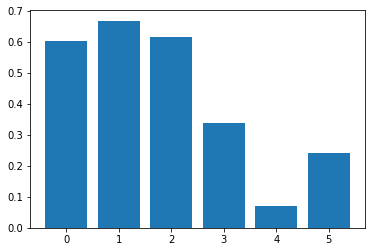

In [ ]:
from matplotlib import pyplot
# GDP, Social Support, Health, Freedom, Generosity, Corruption
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# Two highest scoring features are Social Support and Generosity
X = df[['SocialSupport', 'Generosity']].values

Y = df['Score'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# First model: Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 0.6210076806800187
Mean Squared Error: 0.5564136279422068
Root Mean Squared Error: 0.7459313828645413
R squared score:  0.5301216221674327
